<a href="https://colab.research.google.com/github/myozaw5288/git/blob/master/PK-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.datasets import load_boston
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")


In [46]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [47]:
# Будем использовать только обучающую выборку
dataset = pd.read_csv('./weatherAUS.csv', sep=",")

In [48]:
dataset.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.400,22.900,0.600,nan,nan,W,44.000,W,WNW,20.000,24.000,71.000,22.000,1007.700,1007.100,8.000,nan,16.900,21.800,No,No
1,2008-12-02,Albury,7.400,25.100,0.000,nan,nan,WNW,44.000,NNW,WSW,4.000,22.000,44.000,25.000,1010.600,1007.800,nan,nan,17.200,24.300,No,No
2,2008-12-03,Albury,12.900,25.700,0.000,nan,nan,WSW,46.000,W,WSW,19.000,26.000,38.000,30.000,1007.600,1008.700,nan,2.000,21.000,23.200,No,No
3,2008-12-04,Albury,9.200,28.000,0.000,nan,nan,NE,24.000,SE,E,11.000,9.000,45.000,16.000,1017.600,1012.800,nan,nan,18.100,26.500,No,No
4,2008-12-05,Albury,17.500,32.300,1.000,nan,nan,W,41.000,ENE,NW,7.000,20.000,82.000,33.000,1010.800,1006.000,7.000,8.000,17.800,29.700,No,No
5,2008-12-06,Albury,14.600,29.700,0.200,nan,nan,WNW,56.000,W,W,19.000,24.000,55.000,23.000,1009.200,1005.400,nan,nan,20.600,28.900,No,No
6,2008-12-07,Albury,14.300,25.000,0.000,nan,nan,W,50.000,SW,W,20.000,24.000,49.000,19.000,1009.600,1008.200,1.000,nan,18.100,24.600,No,No
7,2008-12-08,Albury,7.700,26.700,0.000,nan,nan,W,35.000,SSE,W,6.000,17.000,48.000,19.000,1013.400,1010.100,nan,nan,16.300,25.500,No,No
8,2008-12-09,Albury,9.700,31.900,0.000,nan,nan,NNW,80.000,SE,NW,7.000,28.000,42.000,9.000,1008.900,1003.600,nan,nan,18.300,30.200,No,Yes
9,2008-12-10,Albury,13.100,30.100,1.400,nan,nan,W,28.000,S,SSE,15.000,11.000,58.000,27.000,1007.000,1005.700,nan,nan,20.100,28.200,Yes,No


Оптимальное значение λ = 8.472135811722177


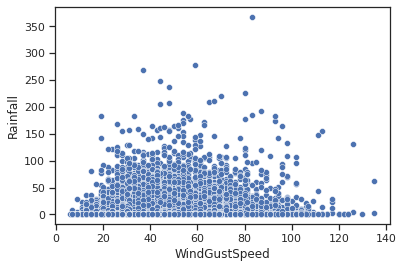

In [51]:
data['WindGustSpeed_boxcox'], param = stats.boxcox(data['WindGustSpeed']) 
print('Оптимальное значение λ = {}'.format(param))
sns.scatterplot(x='WindGustSpeed',y='Rainfall',data=dataset)

In [53]:
wine = load_wine()
wine_X = wine.data
wine_y = wine.target
wine_feature_names = wine['feature_names']
wine_x_df = pd.DataFrame(data=wine['data'], columns=wine['feature_names'])

In [54]:

boston = load_boston()
boston_X = boston.data
boston_y = boston.target
boston_feature_names = boston['feature_names']
boston_x_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [55]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(wine_X, wine_y)

list(zip(boston_feature_names, sel_mi.get_support()))

[('CRIM', True),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', False),
 ('NOX', False),
 ('RM', False),
 ('AGE', True),
 ('DIS', False),
 ('RAD', False),
 ('TAX', True),
 ('PTRATIO', False),
 ('B', True),
 ('LSTAT', True)]

In [56]:
boston_feature_names[sel_mi.get_support()]

array(['CRIM', 'AGE', 'TAX', 'B', 'LSTAT'], dtype='<U7')